In [184]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [185]:
# Loading the data
tweets_df = pd.read_csv('C:/Users/Anish/Desktop/Twitter Sentiment Analysis/TSA/twitter_data.csv')
tweets_df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [186]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [187]:
tweets_df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [188]:
tweets_df["tweet"]

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

In [189]:
tweets_df.drop(["id"], axis=1, inplace = True)
tweets_df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


**DATASET EXPLORATION**

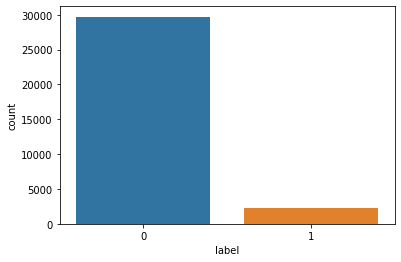

In [190]:
sns.countplot(tweets_df['label'],label = 'Count' )

In [191]:
# Add column with length of the messages
tweets_df["length"] = tweets_df['tweet'].apply(len)

In [192]:
tweets_df.head()

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39


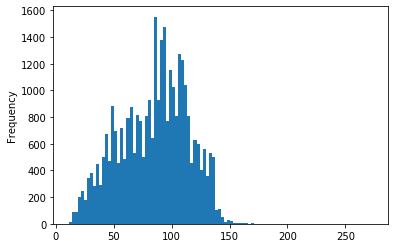

In [193]:
tweets_df['length'].plot(bins=100, kind='hist')

In [194]:
tweets_df.describe()

,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


In [195]:
positive = tweets_df[tweets_df['label']==0]

In [196]:
positive.head()

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39


In [197]:
negative = tweets_df[tweets_df['label']==1]

In [198]:
negative.head()

,label,tweet,length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104


**VISUALIZING TWEETS BY PLOTTING WORDCLOUD**

In [199]:
sentences = tweets_df['tweet'].tolist()

In [200]:
sentences_as_one_string = " ".join(sentences)

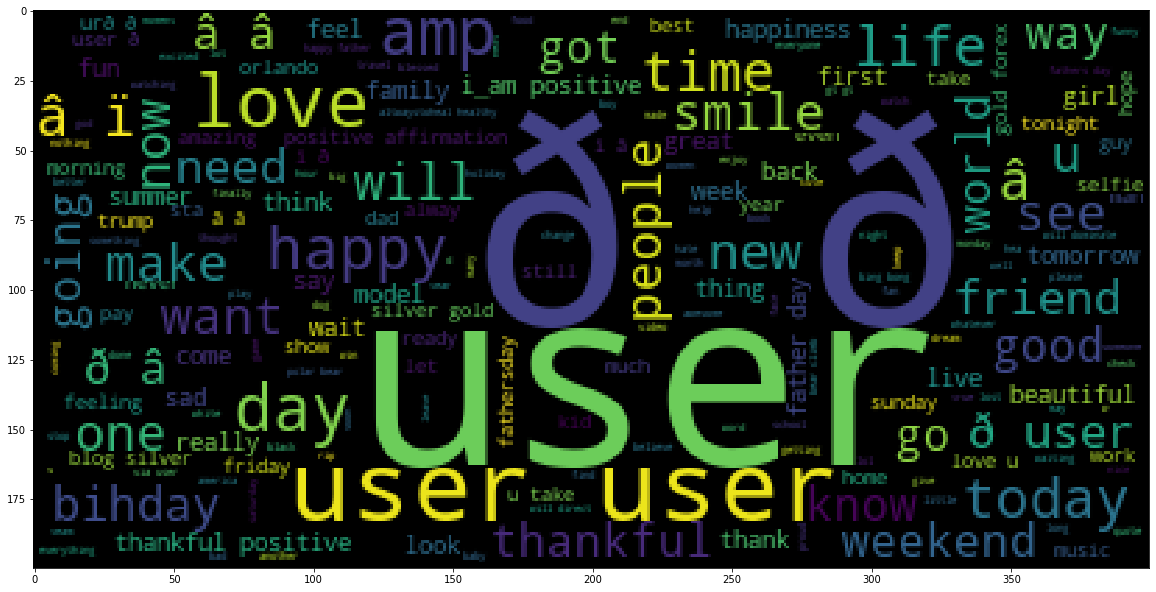

In [201]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

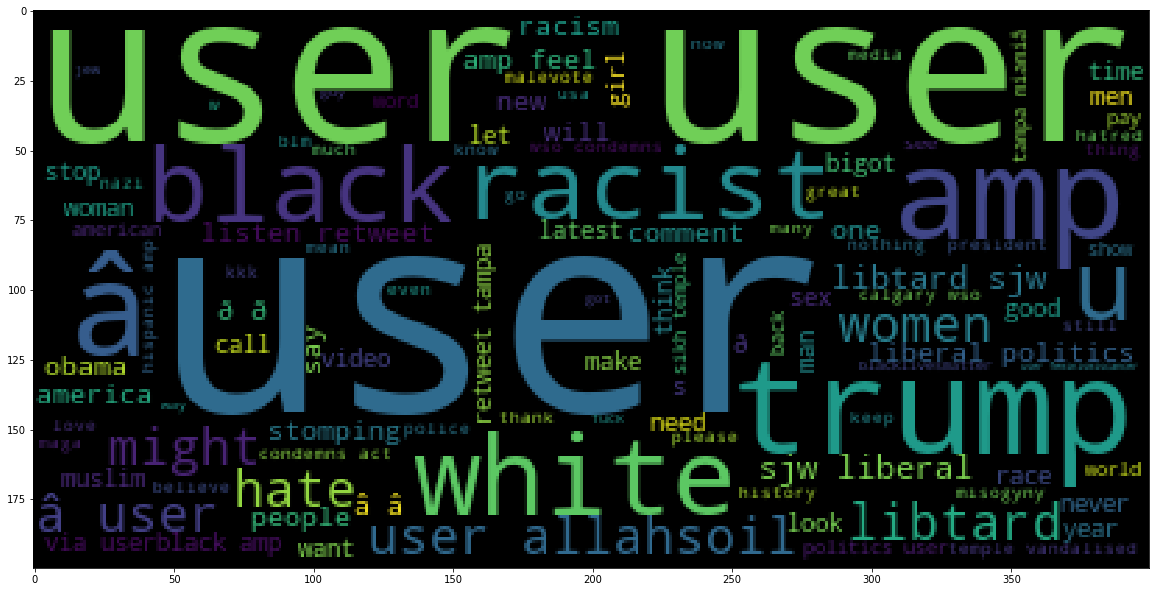

In [202]:
# negative tweets wordcloud
negative_sentences_as_one = " ".join(negative['tweet'].tolist())
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one))

**DATA CLEANING (Removing punctuations and stopwords)**

In [203]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [204]:
Test = 'Hello WorlD!!$ This.... is a test to (remove) punctuation@'

In [205]:
Test_punc_removed = [ c for c in Test if c not in string.punctuation]

In [206]:
Test_punc_removed_joined = "".join(Test_punc_removed)
Test_punc_removed_joined

'Hello WorlD This is a test to remove punctuation'

In [207]:
import nltk # Natural Language tool kit 

nltk.download('stopwords')

from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [208]:
Test_punc_removed_join_clean = [word for word in Test_punc_removed_joined.split() if word.lower() not in stopwords.words('english')]

In [209]:
Test_punc_removed_join_clean

['Hello', 'WorlD', 'test', 'remove', 'punctuation']

**COUNT VECTORIZATION (TOKENIZATION)**

In [210]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first line.','This line is the second line.','And this is the third one.', 'is this the first line.']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)

In [211]:
print(vectorizer.get_feature_names())

['and', 'first', 'is', 'line', 'one', 'second', 'the', 'third', 'this']


In [212]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 0 1 2 0 1 1 0 1]
 [1 0 1 0 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


**PIPELINE TO CLEAN DATA AND PERFORM COUNT VECTORIZATION**

In [213]:
# The pipeline performs the following: (1) removes punctuation, (2) removes stopwords

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [214]:
vectorizer = CountVectorizer(analyzer = message_cleaning, dtype = 'uint8')
tweets_countvectorizer = vectorizer.fit_transform(tweets_df['tweet'])

In [215]:
#print(vectorizer.get_feature_names())

In [216]:
#print(tweets_countvectorizer.toarray())

In [217]:
tweets_countvectorizer.shape

(31962, 47386)

In [218]:
X = pd.DataFrame(tweets_countvectorizer.toarray())

In [219]:
y = tweets_df['label']

**TRAIN AND EVALUATE NAIVE BAYES CLASSIFIER MODEL FIRST**

In [220]:
X.shape

(31962, 47386)

In [221]:
y.shape

(31962,)

In [222]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [223]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [224]:
from sklearn.metrics import classification_report, confusion_matrix

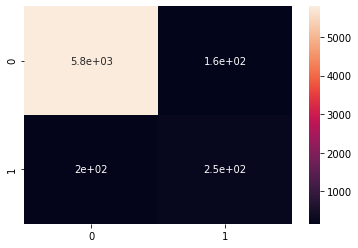

In [225]:
# Evaluating on Test Set
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [226]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5949
           1       0.61      0.56      0.58       444

    accuracy                           0.94      6393
   macro avg       0.79      0.77      0.78      6393
weighted avg       0.94      0.94      0.94      6393



**TRAIN AND EVALUATE A MULTI-LAYER PERCEPTRON**

In [227]:
from sklearn.neural_network import MLPClassifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(8,4,4), early_stopping=True) 
mlp_classifier.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(8, 4, 4), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [228]:
y_predict_test_3 = mlp_classifier.predict(X_test)
print(classification_report(y_test, y_predict_test_3))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5949
           1       0.93      0.50      0.65       444

    accuracy                           0.96      6393
   macro avg       0.95      0.75      0.82      6393
weighted avg       0.96      0.96      0.96      6393

